In [1]:
import random
import sys

import torch

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/my_torch/tuts2', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
import torchaudio
# test for gmm-ubm on whale calls
from importlib import reload
import audio_datastore.audio_datastore as myads
reload(myads)
from collections import Counter
import numpy as np
import config
import librosa
import utils as my_utils
import feature_extraction.fe_spafe.fe_spafe as fe_spafe
import feature_extraction.fe_base as fe_base
import os.path
reload(fe_base)
reload(fe_spafe)

# todo: get SNR noise working, VAD two versions...

<module 'feature_extraction.fe_spafe.fe_spafe' from '/Users/david/Documents/mastersCode/ubm/feature_extraction/fe_spafe/fe_spafe.py'>

In [3]:
# create ads

# female ads
datasetFolder = r"/Users/david/Documents/data/speech/ivectors/SPEECH DATA/FEMALE/MIC"
female_ads = myads.AudioDatastore()
female_ads.populate(datasetFolder, include_sub_folders=True, label_source=True)
Counter(female_ads.labels).values()
# male ads
datasetFolder = r"/Users/david/Documents/data/speech/ivectors/SPEECH DATA/MALE/MIC"
male_ads = myads.AudioDatastore()
male_ads.populate(datasetFolder, include_sub_folders=True, label_source=True)
Counter(male_ads.labels).values()
# combine ads
ads = myads.AudioDatastore()
ads.set([datasetFolder], files=female_ads.files + male_ads.files, labels=female_ads.labels + male_ads.labels)
# split ads
all_labels = ["M01", "M02", "M03", "M04", "M06", "M07", "M08", "M09", "F01", "F02", "F03", "F04", "F06", "F07",
                     "F08", "F09", "M05", "M10", "F05", "F10"]

ads_all = myads.subset(ads, all_labels)

test_file = ads_all.files[0]

Using cache found in /Users/david/.cache/torch/hub/snakers4_silero-vad_master


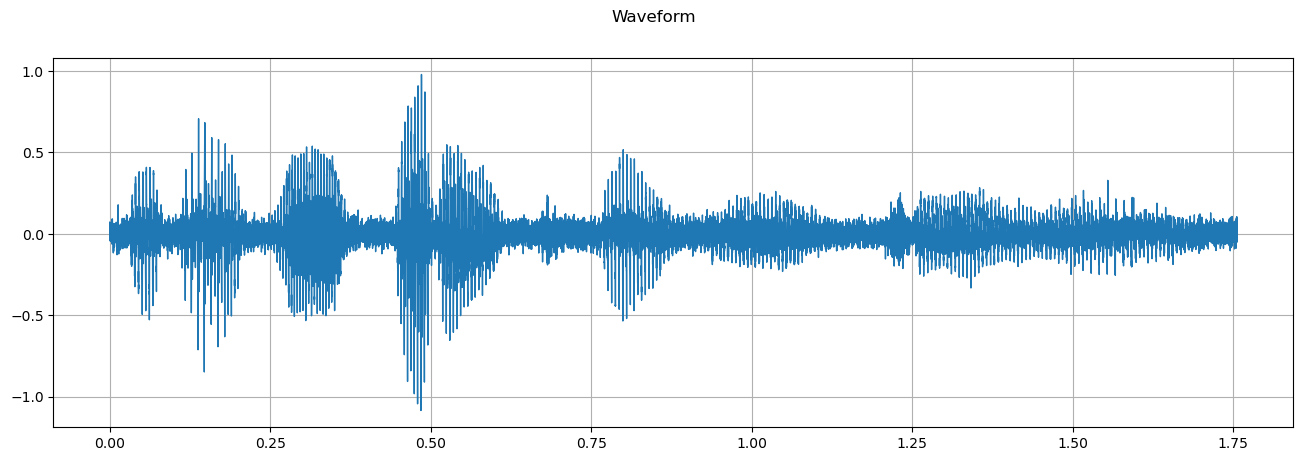

In [52]:
import torch_transforms as torch_t
import my_torch.torchio as tio
reload(torch_t)
reload(tio)

# not quite working ?
compose_transform = torch_t.ComposeTransform([
    torch_t.FileToTensor(),
    torch_t.NormalizeSox(),
    torch_t.SileroVad(),
    torch_t.AddGaussianWhiteNoise(10)
    ])

transformed_audio = compose_transform(test_file)

tio.plot_waveform(transformed_audio)


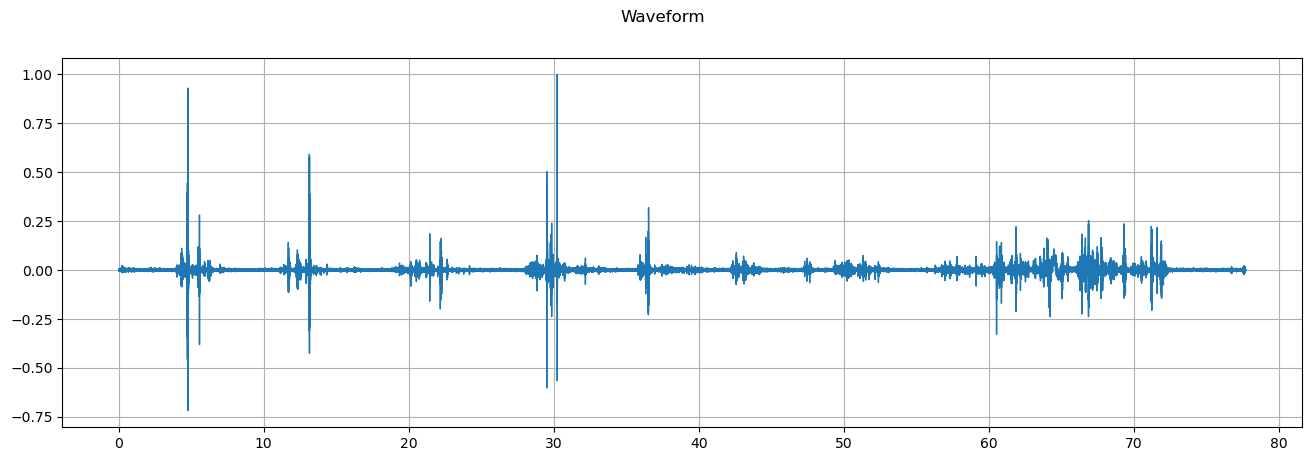

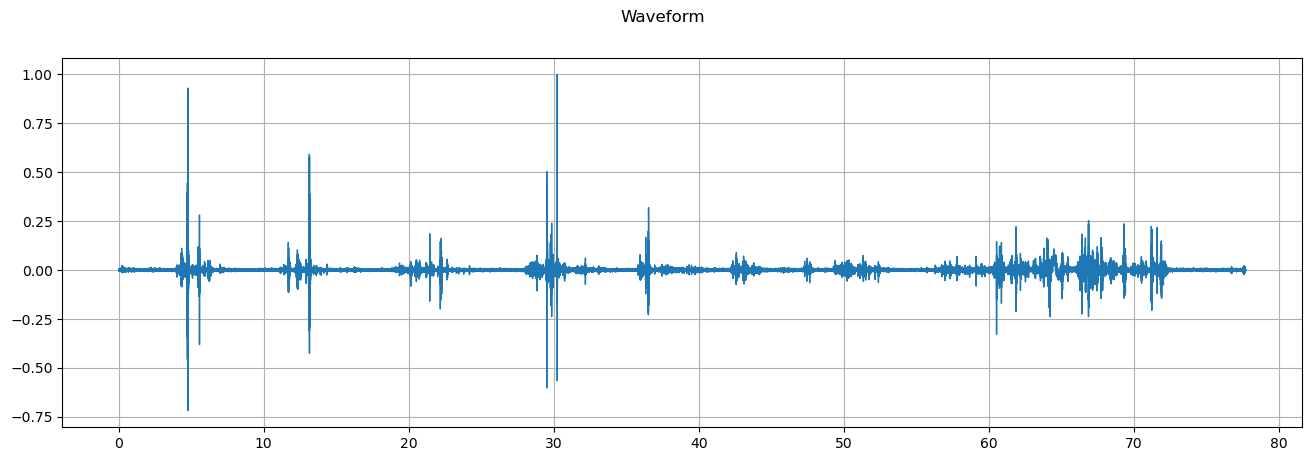

In [53]:

transform_test = torch_t.AddNoiseFromFile(10, noise_file_index=10)
transform_test.plot_play_noise()

In [5]:
tio.play_audio(transformed_audio)

0.01354680628029717
0.013741609447366285


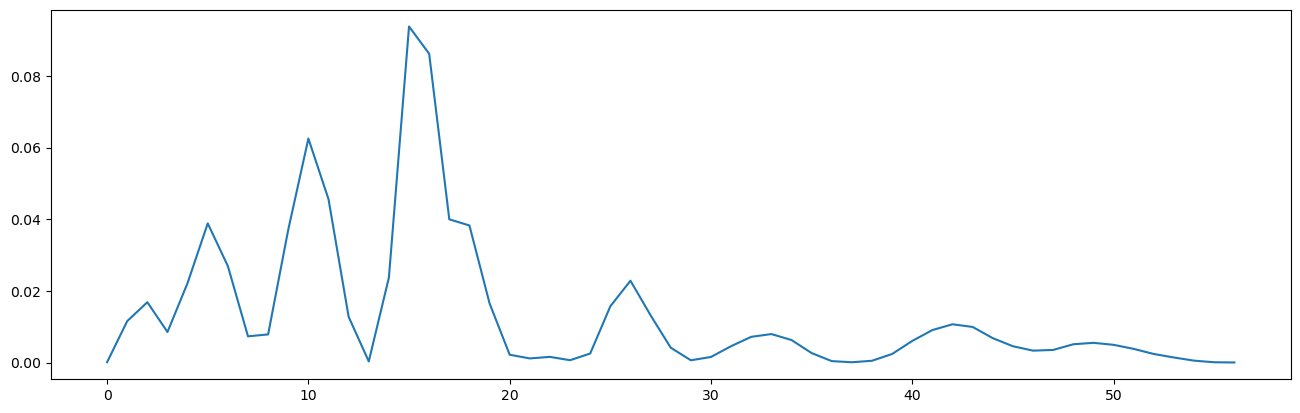

In [6]:
# power calculations

import utils
reload(utils)

print(utils.get_average_power(transformed_audio, use_buffer=True, show_graph=True))
print(utils.get_average_power(transformed_audio, use_buffer=False, show_graph=True))


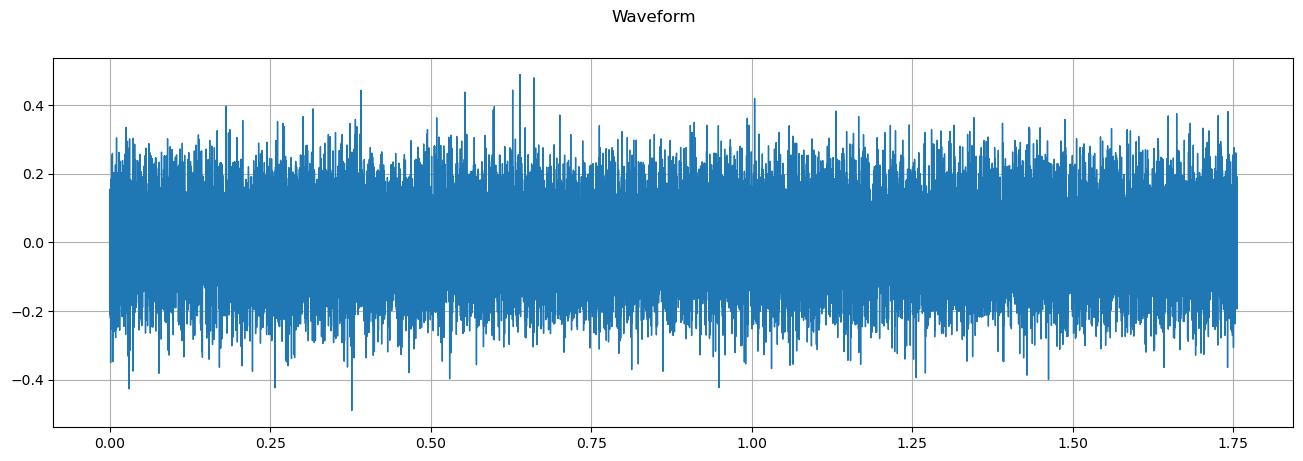

In [7]:
import matplotlib.pyplot as plt
import torch
noise = torch.tensor(np.random.normal(0, np.sqrt(0.013), transformed_audio.size(1))[np.newaxis, ...])
tio.plot_waveform(noise)

In [37]:
import random
random.randint(0, 10)

7

In [29]:
np.isclose(0, -0.5, atol=0.6)

True